In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
import EWdata

### peak of the spectrum

In [25]:
root_path = 'D:/Bubble_Thermal/EWlattice3_data'
c1 = EWdata.constants(eta = 1.0, dx = 0.25, nSize = 256)
BINS = 120

ids = range(16, 50, 50)

time = []
peak_k = []
ave_k = [] # average k value computed form radial spectrum
mean_k = [] # average k value computed from original Cartesian k space values.
for i in ids:
    file_path = os.path.join(root_path, 'non_random_bubbles', 'spec_data', 'nr_1_bfield_'+str(i)+'.npy')
    arr = np.load(file_path)
    if arr[0,-1] == arr[1,-1]:
        kmean = arr[0,-1]
        vals_k = arr[0, :-1]
        mag = arr[1, :-1]
    else:
        vals_k = arr[0]
        mag = arr[1]
    time.append(i)
    peak_k.append( vals_k[np.argmax(mag)] )
    ave_k.append( np.average(vals_k, weights = mag) )
    mean_k.append( kmean )
time = np.array(time)
peak_k = np.array(peak_k)
ave_k = np.array(ave_k)
mean_k = np.array(kmean)

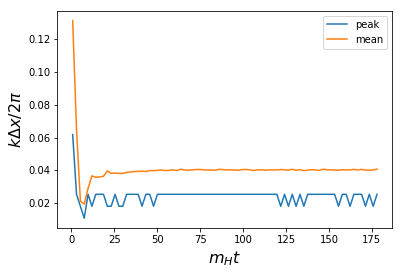

In [16]:
plt.plot(time*c1.dt()*c1.mH(), peak_k, label = 'peak')
plt.plot(time*c1.dt()*c1.mH(), ave_k, label = 'mean')
plt.xlabel('$m_Ht$', fontsize = 16)
plt.ylabel('$k\Delta x/2\pi$', fontsize = 16)
plt.legend()
plt.show()